In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
#psi4.core.set_output_file('output.dat', False)
import time
from scipy.optimize import curve_fit
from scipy import interpolate
from matplotlib import pyplot as plt
from numpy.polynomial import Chebyshev
from scipy import constants
from numpy.polynomial import Polynomial

In [2]:
# setup basic arguments for qed-ci calculation

# z-matrix for H2
mol_str_H2 = """
H
H 1 0.74
symmetry c1
"""

# options for the PFHamiltonian Generator class - include cavity effects
cavity_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 1, #<== this is a minimal photon basis, should explore increasing this 
}

# options for PFHamiltonian Generator class - exclude cavity effects
cavity_free_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
}



In [3]:
mol_tmpl = """
H
H 1 **R**
symmetry c1
"""
options_dict = {
    "basis": "cc-pVQZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 2
}
r_data = np.linspace(0.6, 0.9, 50)
psi4.set_options(options_dict)
fci_S0 = []
fci_S1 = []
for r in r_data:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Fri Dec  1 14:55:19 2023

   => Loading Basis Set <=

    Name: CC-PVQZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    22 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/cc-pvqz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Angstrom), 

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I


*** tstop() called on CHEMYM0V4HTALT at Fri Dec  1 14:55:25 2023
Module time:
	user time   =       0.14 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       4.58 seconds =       0.08 minutes
	system time =       0.92 seconds =       0.02 minutes
	total time  =          6 seconds =       0.10 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential,

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

In [4]:
mol_tmpl_e = """
H
H 1 **R**
symmetry c1
"""

r_data_e = np.linspace(1.15, 1.45, 50)
psi4.set_options(options_dict)
fci_S0_e = []
fci_S1_e = []
for r in r_data_e:
    mol_str_e = mol_tmpl.replace("**R**", str(r))
    mol_e = psi4.geometry(mol_str_e)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0_e.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1_e.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Fri Dec  1 14:58:29 2023

   => Loading Basis Set <=

    Name: CC-PVQZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    22 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/cc-pvqz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Angstrom), 


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

      47A      8.083013    48A      8.104527    49A      8.104527  
      50A      8.270146    51A      8.270146    52A      8.409313  
      53A      8.409313    54A      8.478869    55A      8.478869  
      56A      8.966101    57A      8.983994    58A      8.983994  
      59A      9.856052    60A     11.933072  

    Final Occupation by Irrep:
              A 
    DOCC [     1 ]
    NA   [     1 ]
    NB   [     1 ]

  @RHF Final Energy:    -1.07088273823918

   => Energetics <=

    Nuclear Repulsion Energy =              0.4553061162920107
    One-Electron Energy =                  -2.0657835015738621
    Two-Electron Energy =                   0.5395946470426731
    Total Energy =                         -1.0708827382391783

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
  

 ------------------------------------------------------------------------------------

*** tstop() called on CHEMYM0V4HTALT at Fri Dec  1 14:58:32 2023
Module time:
	user time   =       0.14 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      33.43 seconds =       0.56 minutes
	system time =       6.43 seconds =       0.11 minutes
	total time  =        193 seconds =       3.22 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

    Two-Electron Energy =                   0.5025429743782999
    Total Energy =                         -1.0340987994760702

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         -0.0000000            0.0000000           -0.0000000
 Magnitude           :                                                    0.0000000

 ---------------------------------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

    EX ALLOW       =  1  1 
    STATE AVERAGE  =  0(1.00) 

   ==> CI Orbital and Space information <==

   ------------------------------------
               Space    Total     A
   ------------------------------------
                 Nso       60    60
                 Nmo       60    60
               Ndocc        1     1
               Nsocc        0     0
   ------------------------------------
              CI Spaces
   ------------------------------------
        Dropped DOCC        0     0
              Active       60    60
        Dropped UOCC        0     0
   ------------------------------------

   ==> Setting up CI strings <==

    There are 60 alpha and 60 beta strings
    The CI space requires 3600 (3.60E+03) determinants and 1 blocks

   ==> Transforming CI integrals <==

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

In [5]:
# z-matrix for H2
mol_str_H2 = """
H
H 1 0.74
symmetry c1
"""

# let's run a psi4 geometry optimization to get the optimal geometry

# set the options
psi4.set_options(options_dict)

# first set the coordinates in init_string as the molecule's geometry 
mol0_H2 = psi4.geometry(mol_str_H2)

# now capture the psi4 geometry data with the guess coordinates
init_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol0_H2)

# run the geometry optimization
psi4.optimize("fci")

guess_geometry_H2 = mol0_H2.geometry()
print(guess_geometry_H2)

guess_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol0_H2)



Scratch directory: /tmp/

         ----------------------------------------------------------
                                   FINDIF
                     R. A. King and Jonathon Misiewicz
         ----------------------------------------------------------

  Using finite-differences of energies to determine gradients.
    Generating geometries for use with 3-point formula.
    Displacement size will be 5.00e-03.
    Number of atoms is 2.
    Number of symmetric SALCs is 1.
    Translations projected? 1. Rotations projected? 1.
    Number of geometries (including reference) is 3.
 3 displacements needed ...

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //    FiniteDifference Computations  //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

   ==> Transforming CI integrals <==

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.

   ==> Starting CI iterations <==

    H0 Block Eigenvalue =  -1.13543299

    Simultaneous Expansion Method (Block Davidson Method)
    Using 2 initial trial vectors

(sem_iter): H0block_->H0b_diag[1][1] - H0block_->H0b_diag[2][1] = 0.650229 - -0.650229 = 1.300457 > 1.0E-8
     Iter   Root       Total Energy       Delta E      C RMS

   @CI  0:     0     -1.135432992145   -1.8470E+00   3.8996E-01  
   @CI  0:     1     -0.658658859225   -1.3702E+00   2.5221E-01  

   @CI  1:     0     -1.172142100698   -3.6709E-02   9.9036E-02  
   @CI  1:     1     -0.685300501649   -2.6642E-02   7.2611E-02  

   @CI  2:     0     -1.173


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

    The CI space requires 3600 (3.60E+03) determinants and 1 blocks

   ==> Transforming CI integrals <==

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.

   ==> Starting CI iterations <==

    H0 Block Eigenvalue =  -1.13545261

    Simultaneous Expansion Method (Block Davidson Method)
    Using 2 initial trial vectors

(sem_iter): H0block_->H0b_diag[1][1] - H0block_->H0b_diag[2][1] = -0.650434 - 0.650434 = -1.300867 > 1.0E-8
     Iter   Root       Total Energy       Delta E      C RMS

   @CI  0:     0     -1.135452611894   -1.8524E+00   3.9106E-01  
   @CI  0:     1     -0.656763793712   -1.3738E+00   2.5214E-01  

   @CI  1:     0     -1.172152620463   -3.6700E-02   9.8844E-02  
   @CI  1:     1     -0.

In [6]:
# set the options
psi4.set_options(options_dict)

# first set the coordinates in guess_string as the molecule's geometry 
mol_H2 = psi4.geometry(mol_str_H2)

# now capture the psi4 geometry data with the guess coordinates
guess_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol_H2)

# run the geometry optimization
psi4.optimize("fci")

opt_geometry = mol_H2.geometry()

# capture the psi4 geometry data from the optimization
opt_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol_H2)

# run excited-state calculations - get first 5 excited states
n_states = 5

# run psi4 TDSCF at same level of theory as geometry optimization
psi4_rhf_e, wfn_H2 = psi4.frequency("fci/cc-pVQZ", return_wfn=True, molecule=mol_H2,maxiter=50)




Scratch directory: /tmp/

         ----------------------------------------------------------
                                   FINDIF
                     R. A. King and Jonathon Misiewicz
         ----------------------------------------------------------

  Using finite-differences of energies to determine gradients.
    Generating geometries for use with 3-point formula.
    Displacement size will be 5.00e-03.
    Number of atoms is 2.
    Number of symmetric SALCs is 1.
    Translations projected? 1. Rotations projected? 1.
    Number of geometries (including reference) is 3.
 3 displacements needed ...

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //    FiniteDifference Computations  //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

    *  18    0.017200  (   15,    3)  4AB 16AA 
    *  19    0.017200  (    4,   14)  5AA 15AB 
    *  20    0.017200  (   14,    4)  5AB 15AA 


   ==> FCI root 1 information <==

    FCI Root 1 energy =    -0.686280137519920

   The 20 most important determinants:

    *   1    0.689528  (    0,    1)  1AA 2AB 
    *   2    0.689528  (    1,    0)  1AB 2AA 
    *   3    0.105927  (    2,    1)  2AB 3AA 
    *   4    0.105927  (    1,    2)  2AA 3AB 
    *   5    0.069956  (    5,    0)  1AB 6AA 
    *   6    0.069956  (    0,    5)  1AA 6AB 
    *   7    0.054761  (    1,   10)  2AA 11AB 
    *   8    0.054761  (   10,    1)  2AB 11AA 
    *   9   -0.049693  (    1,    6)  2AA 7AB 
    *  10   -0.049693  (    6,    1)  2AB 7AA 
    *  11   -0.025383  (    5,    6)  6AA 7AB 
    *  12   -0.025383  (    6,    5)  6AB 7AA 
    *  13   -0.021025  (    3,    8)  4AA 9AB 
    *  14   -0.021025  (    8,    3)  4AB 9AA 
    *  15   -0.021025  (    4,    7)  5AA 8AB 
    *  16   -0.021025  ( 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

   @CI  2:     0     -1.173738185326   -1.6082E-03   1.6010E-02  
   @CI  2:     1     -0.687401919072   -1.5272E-03   1.5840E-02  

   @CI  3:     0     -1.173785976068   -4.7791E-05   3.1840E-03  
   @CI  3:     1     -0.687482922294   -8.1003E-05   4.6075E-03  

   @CI  4:     0     -1.173787711384   -1.7353E-06   4.9608E-04  
   @CI  4:     1     -0.687487772432   -4.8501E-06   7.4701E-04  

   @CI  5:     0     -1.173787746683   -3.5298E-08   5.7795E-05  
   @CI  5:     1     -0.687487935409   -1.6298E-07   1.6148E-04  

   @CI  6:     0     -1.173787747269   -5.8642E-10   7.5537E-06  
   @CI  6:     1     -0.687487944687   -9.2780E-09   3.5135E-05  

   @CI  7:     0     -1.173787747279   -9.8146E-12   1.0234E-06 c
   @CI  7:     1     -0.687487945049   -3.6175E-10   8.0931E-06  

   @CI  8:     0     -1.173787747279   4.2188E-15   1.0234E-06 c
   @CI  8:     1     -0.687487945063   -1.3821E-11   1.2074E-06 c


   ==> Energetics <==

    SCF energy =           -1.133397990666304



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

	system time =       0.01 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      80.41 seconds =       1.34 minutes
	system time =      15.96 seconds =       0.27 minutes
	total time  =        259 seconds =       4.32 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 762803 non-zero two-electron integra

  non-mass-weighted Hessian:       Symmetric? True   Hermitian? True   Lin Dep Dim?  3 (0)
  projection of translations (True) and rotations (True) removed 5 degrees of freedom (5)
  total projector:                 Symmetric? True   Hermitian? True   Lin Dep Dim?  5 (5)
  mass-weighted Hessian:           Symmetric? True   Hermitian? True   Lin Dep Dim?  3 (0)
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0001  [cm^-1]
  pre-proj  all modes:['45.1288i' '42.3309i' '0.0000i' '0.0000i' '0.0001' '4404.6774']
  projected mass-weighted Hessian: Symmetric? True   Hermitian? True   Lin Dep Dim?  5 (5)
  post-proj low-frequency mode:    0.0001i [cm^-1] (TR)
  post-proj low-frequency mode:    0.0001i [cm^-1] (TR)
  post-proj low-frequency mode:    0.0000i [cm^-1] (TR)
  post-proj low-frequency mode:    0

## Calculation of k
Fit ground state PES of H2 to a quintic polynomial

Calculated value of k is very close to literature value (~$575 N/m$), so I am now conficent that the issue is in $ x_0 $

Min on S0 is 0.7408163265306122
Min on S1 is 1.3581632653061224
578.6460920746534


<function matplotlib.pyplot.show(close=None, block=None)>

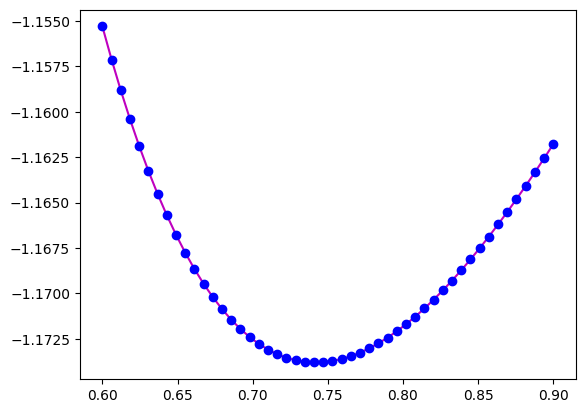

In [7]:
# Constants and Variables
au_to_SI = (4.35974 * 10 ** (-18)) * 10 ** 20
min_S0_loc = np.argmin(fci_S0[:])
min_S1_loc = np.argmin(fci_S1_e[:])
r_eq_ang = r_data[min_S0_loc]
print(f'Min on S0 is {r_data[min_S0_loc]}')
print(f'Min on S1 is {r_data_e[min_S1_loc]}')

# Fitting S0 PES to a quintic polynomial
poly = np.poly1d(np.polyfit(r_data, fci_S0, 5))

#Taking first and second derivative of S0 PES and evaluating at r_eq
first_derivative = poly.deriv()
second_derivative = first_derivative.deriv()
k_test_au = second_derivative(r_eq_ang)
k_test_SI = k_test_au * au_to_SI
print(k_test_SI)

#plotting S0 PES and quintic fit
plt.plot(r_data, poly(r_data), 'm-', label='fit')
plt.plot(r_data, fci_S0[:], 'bo', label='cavity free |g>')
plt.show

## Calculation of $ \text{x}_0 $

$$ \frac{\hbar}{2}\sqrt{\frac{k}{\mu}} = \frac{k}{2}(x_0 - x_{eq})^2  $$

Expanded, solved for $ x_o $, and found zeros using quadratic formula

In [8]:
mu_amu = 1.007 / 2
mu_kg = mu_amu * 10 ** (-3) / (6.022 * 10 ** 23) 
r_eq_SI = r_eq_ang * 10 ** (-10)
h_bar = constants.hbar
left = (h_bar / 2) * np.sqrt(k_test_SI / mu_kg)
a = 0.5 * k_test_SI 
b = -k_test_SI * r_eq_SI
c = 0.5 * k_test_SI * (r_eq_SI ** 2) - left
zeros_n = (-b - np.sqrt((b ** 2) - 4 * a * c)) / (2 * a)
zeros_p = (-b + np.sqrt((b ** 2) - 4 * a * c)) / (2 * a)
x0_angstrom = zeros_n * 10 ** 10
x0_au = x0_angstrom / psi4.constants.bohr2angstroms
print(x0_au)

1.167254632479461


## Calculation of the Huang-Rhys Factor
Huang Rhys factor can be calculated by both

$$ S = 1/2(\Delta x / x_0)^2 \tag{Turner}$$

from the mode anharmonicity paper

and 

$$ S = \frac{m\omega_{vib} \Delta x^2}{2 \hbar} \tag{Hsu}$$

from the polaritonic Huang-Rhys factor paper

In [9]:
# Constants and Variables
x_0 = wfn_H2.frequency_analysis["Xtp0"].data[5] 
delta_au = (r_data_e[min_S1_loc] - r_data[min_S0_loc]) / psi4.constants.bohr2angstroms
delta_m = (r_data_e[min_S1_loc] - r_data[min_S0_loc]) * 10 ** (-10)
omega_vib = np.sqrt(k_test_SI / mu_kg)
h_bar = constants.hbar

# Turner
S_Turner = 0.5 * (delta_au / x0_au) ** 2

# Hsu
S_Hsu = mu_kg * omega_vib * delta_m ** 2 / (2 * h_bar)

print(S_Turner)
print(S_Hsu)

0.4994535729993717
12.568640816590854


First plot the ground-state potential energy surfaces for $ \text{H}_2 $ inside and outisde the cavity.  The effect of the cavity will raise the energy slightly.

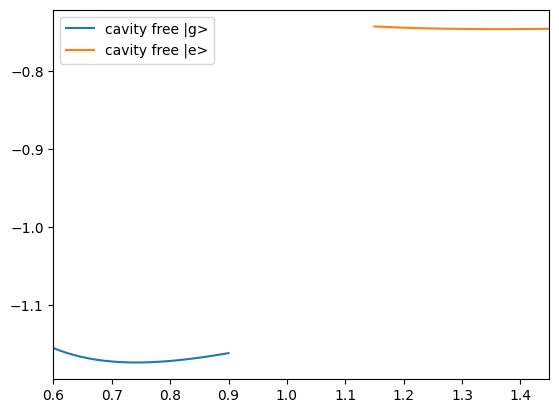

In [14]:
plt.plot(r_data, fci_S0, label='cavity free |g>')
plt.plot(r_data_e, fci_S1_e, label='cavity free |e>')
#plt.plot(r_array, cavity_free_E_array_LiH[:,1], 'b-', label='cavity free LiH |e>')
#plt.plot(r_array, V_fit, label='fit')
plt.xlim(0.6, 1.45)
plt.legend()
plt.show()